# **Problem Statement**
The problem is preety much stright forward, we all are famelier with Garbage and waste material which is very harmful for our society.if we talk about amount of waste then the world almost generates at least 5 million tons of waste per day and this number is still increasing day by day that's why we need to aware about waste. This model which help us to classify waste with 7 different waste materials and it will show you the details of that particular waste materials. This will help to raise awareness for people to reduce and recycle waste.
## **Overview**
- There are <b>'cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash'</b> total 7 different types of waste materials which are use for recycling.
- Here I have 4213 images belonging 7 classes.
- Here I have trained dataset using pretrained VGG16,RESNET50 model via using Transfer Learning and Fine Tuning technique for classification.
- Here I will train this model till 100 epochs with apply early stoping and i got ----- accuracy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2
import sklearn 
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


## **Train Datasets Collection & Understanding**

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Garbage Classification/Data/train'

(4213, 224, 224, 3) (4213,)


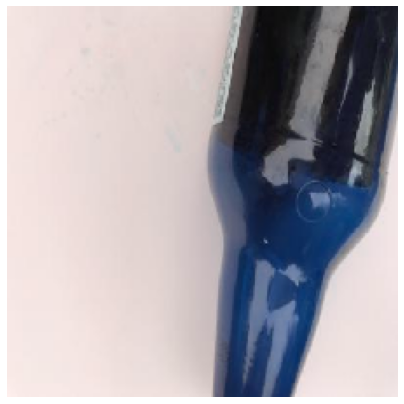

In [ ]:
dict = {
    'paper': 0,
    'plastic': 1, 
    'cardboard': 2,
    'compost': 3, 
    'trash': 4,
    'metal': 5,
    'glass': 6
}

train_data = []
train_labels = []
for i in os.listdir(train_path):
  dir = train_path + '/' + i
  for j in os.listdir(dir):
    img_path = dir + '/' + j
    img = cv2.imread(img_path,-1)
    img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
    train_data.append(img)
    train_labels.append(dict[i]) # Hey Deepak, edit this

plt.figure(figsize=(7,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)

## Training Datas Labels 

In [ ]:
# Show the data classes
classes = os.listdir(train_path)
classes

['paper', 'plastic', 'cardboard', 'compost', 'trash', 'metal', 'glass']

### **Test Datasets Collection & Understanding**

In [ ]:
test_path = '/content/drive/MyDrive/Colab Notebooks/Garbage Classification/Data/test'

In [ ]:
#Loading train datasets
test_data = []
test_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(test_path):
    dir = test_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(dict[i])


test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)


(564, 224, 224, 3) (564,)


### **Data Augmentation part done on training Dataset**

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 4213 images belonging to 7 classes.


In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### **Data Augmentation Visualization**

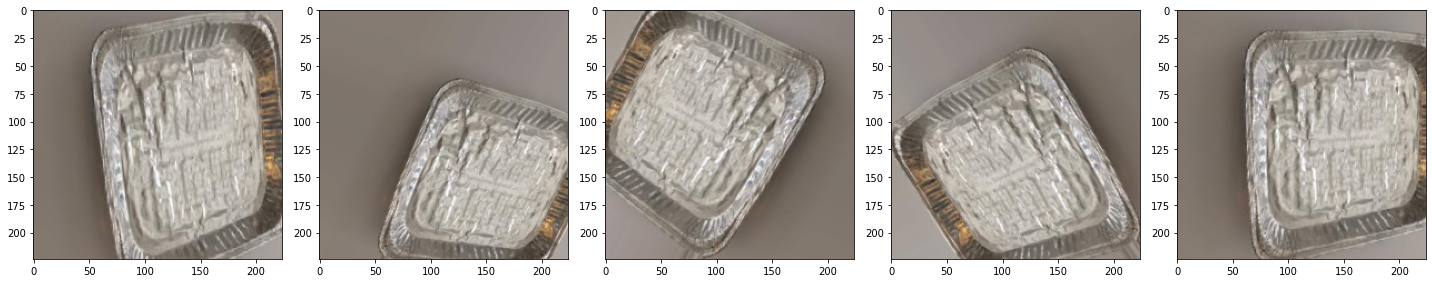

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Traingn images')

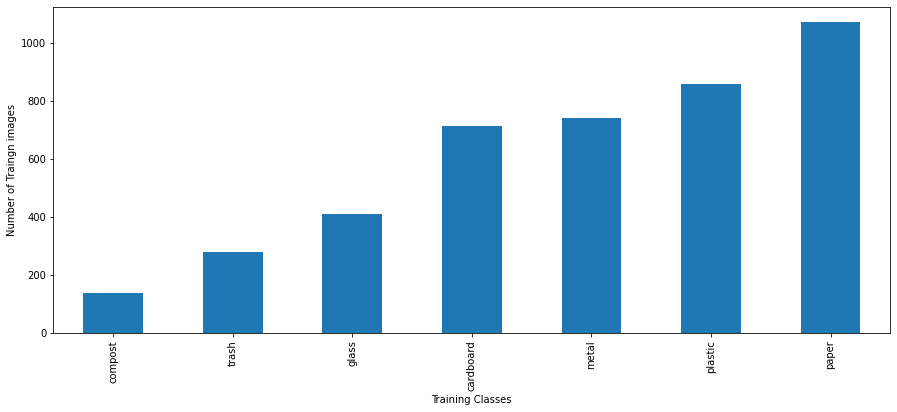

In [ ]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(train_path):
    data_dic[folder] = len(os.listdir(train_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

### **Data Augmentation part done on Testing Dataset**

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
testing_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
testing_data = testing_datagen.flow_from_directory(test_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 564 images belonging to 7 classes.


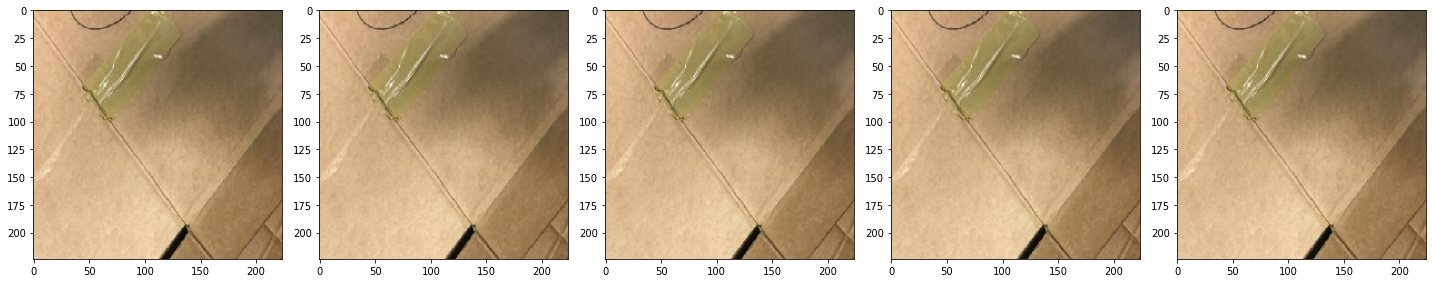

In [ ]:
# showing augmented images
images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Valedation images')

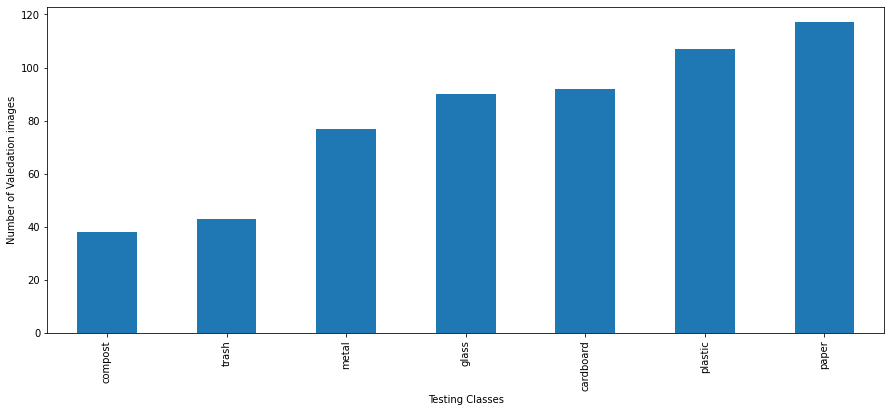

In [ ]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(test_path):
    data_dic[folder] = len(os.listdir(test_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

## **CNN - VGG16 Architeture using Tranfer Learning**

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
'''
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
'''

from keras.utils import np_utils


In [ ]:
train_labels.shape

(4213,)

In [ ]:
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels 


Y_train = (np_utils.to_categorical(y_train))
Y_test = (np_utils.to_categorical(y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4213, 224, 224, 3)
(4213, 7)
(564, 224, 224, 3)
(564, 7)


In [ ]:
# We build the base model
base_model = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# We freeze every layer in our base model so that they do not train, we want that our feature extractor stays as before --> transfer learning
for layer in base_model.layers: 
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')


# We take the last layer of our the model and add it to our classifier
last = base_model.layers[-1].output
x = Flatten()(last)
#x = Dense(1000, activation='relu', name='fc1')(x)
#x = Dropout(0.3)(x)
prediction = Dense(len(os.listdir(train_path)), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)


Layer input_4 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.


In [ ]:
# We compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
model.summary() # Tranfer Learning Summary

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'vgg16_model.weights.best.hdf5', 
                               verbose = False, 
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')

In [ ]:
result_VGG_TF = model.fit(training_data,steps_per_epoch=len(training_data),epochs=50,callbacks=[early_stop, checkpointer],validation_data=testing_data,validation_steps=len(testing_data))

'''
# We start the training
epochs = 100
batch_size = 256
# We train it
result_VGG_TF = model.fit(X_train, Y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_test, Y_test),
                                    epochs = 100)
                                    '''

Epoch 1/50
132/132 [==============================] - 54s 402ms/step - loss: 1.2468 - accuracy: 0.5730 - val_loss: 0.9311 - val_accuracy: 0.6649
Epoch 2/50
132/132 [==============================] - 52s 393ms/step - loss: 0.8718 - accuracy: 0.7000 - val_loss: 0.9158 - val_accuracy: 0.6613
Epoch 3/50
132/132 [==============================] - 52s 395ms/step - loss: 0.7715 - accuracy: 0.7353 - val_loss: 0.7223 - val_accuracy: 0.7340
Epoch 4/50
132/132 [==============================] - 52s 395ms/step - loss: 0.6943 - accuracy: 0.7638 - val_loss: 0.6830 - val_accuracy: 0.7482
Epoch 5/50
132/132 [==============================] - 52s 395ms/step - loss: 0.6849 - accuracy: 0.7674 - val_loss: 0.5922 - val_accuracy: 0.7837
Epoch 6/50
132/132 [==============================] - 52s 396ms/step - loss: 0.6385 - accuracy: 0.7755 - val_loss: 0.7825 - val_accuracy: 0.7394
Epoch 7/50
132/132 [==============================] - 52s 395ms/step - loss: 0.6076 - accuracy: 0.7921 - val_loss: 0.7784 - val_ac

'\n# We start the training\nepochs = 100\nbatch_size = 256\n# We train it\nresult_VGG_TF = model.fit(X_train, Y_train,\n                                    batch_size=batch_size,\n                                    validation_data=(X_test, Y_test),\n                                    epochs = 100)\n                                    '

In [ ]:
result_VGG_TF.lr_find(start_lr=1e-6,end_lr=1e1)
result_VGG_TF.recorder.plot()

In [ ]:
probs = model.predict(testing_data,steps = len(testing_data), verbose = 1)


18/18 [==============================] - 2s 100ms/step


In [ ]:
preds = np.argmax(probs,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.15      0.14      0.14       117
           1       0.34      0.09      0.15       107
           2       0.14      0.11      0.12        92
           3       0.12      0.29      0.17        38
           4       0.11      0.35      0.16        43
           5       0.12      0.17      0.14        77
           6       0.26      0.07      0.11        90

    accuracy                           0.14       564
   macro avg       0.18      0.17      0.14       564
weighted avg       0.20      0.14      0.14       564

[[16  7  7 15 39 29  4]
 [19 10 20 13 24 15  6]
 [22  5 10 10 21 20  4]
 [ 5  0  3 11  9  9  1]
 [ 8  2  4  6 15  7  1]
 [18  1  9 22 13 13  1]
 [18  4 16 13 21 12  6]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)


cm

array([[16,  7,  7, 15, 39, 29,  4],
       [19, 10, 20, 13, 24, 15,  6],
       [22,  5, 10, 10, 21, 20,  4],
       [ 5,  0,  3, 11,  9,  9,  1],
       [ 8,  2,  4,  6, 15,  7,  1],
       [18,  1,  9, 22, 13, 13,  1],
       [18,  4, 16, 13, 21, 12,  6]])

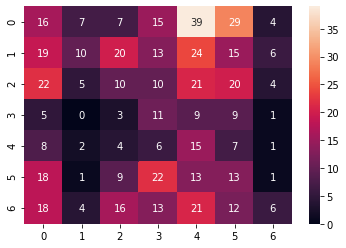

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,preds)
score

0.14361702127659576

In [ ]:
# We evaluate the accuracy and the loss in the test set
scores = model.evaluate(testing_data, steps = len(testing_data), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

18/18 [==============================] - 2s 116ms/step - loss: 0.5417 - accuracy: 0.8085
Test loss: 0.5417254567146301
Test accuracy: 0.8085106611251831


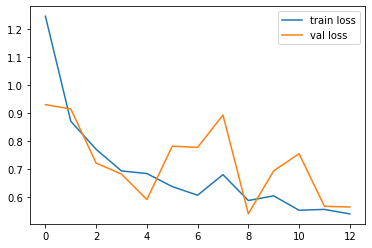

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(result_VGG_TF.history['loss'], label='train loss')
plt.plot(result_VGG_TF.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

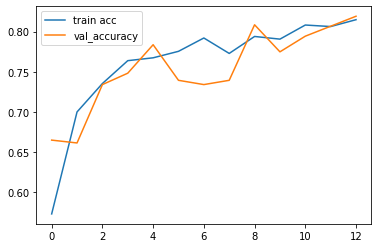

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(result_VGG_TF.history['accuracy'], label='train acc')
plt.plot(result_VGG_TF.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(testing_data)

In [ ]:
y_pred

array([[1.5374169e-09, 9.7271702e-10, 8.2858258e-01, ..., 7.1708413e-08,
        1.7119963e-01, 4.6767050e-06],
       [4.5297933e-05, 4.7902508e-14, 1.3459130e-10, ..., 9.9995470e-01,
        4.9606816e-09, 2.9414367e-11],
       [5.4733112e-04, 7.6720404e-04, 1.6194552e-03, ..., 2.3436436e-01,
        4.8258683e-01, 1.9874686e-02],
       ...,
       [1.1378409e-05, 4.1279014e-10, 7.0180207e-02, ..., 9.0043643e-05,
        9.0653339e-05, 1.3489316e-07],
       [5.7389762e-04, 5.9561990e-04, 4.2541313e-01, ..., 1.7613816e-03,
        6.2061828e-03, 7.3544062e-03],
       [9.4110928e-06, 2.9589486e-10, 7.1793735e-01, ..., 7.1306827e-06,
        1.0931374e-02, 1.7091284e-05]], dtype=float32)

In [ ]:
prediction = np.argmax(y_pred,axis =1)

In [ ]:
prediction

array([2, 4, 5, 2, 4, 0, 0, 0, 5, 4, 4, 6, 4, 3, 4, 0, 3, 3, 5, 3, 2, 6,
       2, 5, 0, 3, 6, 4, 3, 5, 4, 2, 0, 2, 5, 4, 6, 3, 1, 5, 0, 6, 1, 3,
       4, 2, 5, 4, 5, 3, 5, 1, 5, 4, 1, 5, 3, 5, 4, 3, 1, 4, 5, 3, 0, 4,
       4, 5, 0, 5, 0, 0, 0, 4, 3, 0, 3, 0, 0, 4, 0, 3, 4, 4, 4, 5, 0, 0,
       2, 4, 0, 4, 1, 4, 0, 5, 2, 1, 3, 4, 4, 4, 3, 0, 4, 5, 4, 4, 0, 3,
       4, 0, 4, 4, 2, 5, 4, 2, 1, 5, 3, 4, 5, 4, 5, 5, 4, 3, 4, 2, 5, 0,
       4, 4, 2, 5, 5, 0, 4, 4, 4, 1, 4, 4, 4, 3, 5, 4, 0, 5, 0, 0, 5, 4,
       5, 2, 6, 3, 0, 2, 4, 0, 0, 0, 0, 5, 4, 3, 4, 0, 4, 4, 0, 5, 2, 2,
       4, 3, 3, 0, 1, 3, 3, 4, 0, 3, 2, 2, 1, 5, 2, 2, 0, 2, 5, 0, 5, 5,
       4, 5, 0, 5, 5, 3, 4, 2, 0, 5, 0, 0, 2, 4, 3, 5, 2, 0, 2, 5, 2, 5,
       4, 6, 6, 5, 4, 3, 3, 0, 4, 4, 0, 5, 6, 4, 4, 0, 3, 0, 0, 2, 4, 2,
       0, 2, 5, 2, 3, 3, 1, 3, 5, 5, 2, 3, 2, 0, 6, 3, 2, 5, 6, 0, 4, 4,
       2, 5, 2, 3, 5, 3, 5, 0, 4, 0, 5, 6, 4, 5, 0, 1, 4, 1, 1, 3, 1, 4,
       5, 5, 1, 3, 4, 2, 5, 5, 4, 3, 3, 3, 1, 3, 1,

In [ ]:
rev_dict = {
    0 : 'paper',
    1 :'plastic', 
    2 : 'cardboard',
    3 : 'compost', 
    4 : 'trash',
    5 :'metal',
    6 : 'glass'
}

In [ ]:
rev_dict.values()

dict_values(['paper', 'plastic', 'cardboard', 'compost', 'trash', 'metal', 'glass'])

In [ ]:
rev_dict.values() 

In [ ]:
y_hat_pred = []
for i in prediction:
  y_hat_pred.append(rev_dict[i])

In [ ]:
y_hat_pred

['cardboard',
 'trash',
 'metal',
 'cardboard',
 'trash',
 'paper',
 'paper',
 'paper',
 'metal',
 'trash',
 'trash',
 'glass',
 'trash',
 'compost',
 'trash',
 'paper',
 'compost',
 'compost',
 'metal',
 'compost',
 'cardboard',
 'glass',
 'cardboard',
 'metal',
 'paper',
 'compost',
 'glass',
 'trash',
 'compost',
 'metal',
 'trash',
 'cardboard',
 'paper',
 'cardboard',
 'metal',
 'trash',
 'glass',
 'compost',
 'plastic',
 'metal',
 'paper',
 'glass',
 'plastic',
 'compost',
 'trash',
 'cardboard',
 'metal',
 'trash',
 'metal',
 'compost',
 'metal',
 'plastic',
 'metal',
 'trash',
 'plastic',
 'metal',
 'compost',
 'metal',
 'trash',
 'compost',
 'plastic',
 'trash',
 'metal',
 'compost',
 'paper',
 'trash',
 'trash',
 'metal',
 'paper',
 'metal',
 'paper',
 'paper',
 'paper',
 'trash',
 'compost',
 'paper',
 'compost',
 'paper',
 'paper',
 'trash',
 'paper',
 'compost',
 'trash',
 'trash',
 'trash',
 'metal',
 'paper',
 'paper',
 'cardboard',
 'trash',
 'paper',
 'trash',
 'plasti

# Apply Fine-tuning on VGG16

In [ ]:
# We allow to the last convolutional andthe classification stages  to train
for layer in base_model.layers:
  if layer.name == 'block5_conv1': ## Fine Tuning Carry out
    break
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')

# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(len(os.listdir(train_path)), activation='softmax', name='predictions')(x)
model_Res = Model(base_model.input, x)


# We compile the model
model_Res.compile(optimizer=Adam(lr=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
# We see the new structure of the model
model_Res.summary() # Fine Tuning Summary

Layer input_4 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
result_Res_FT = model_Res.fit(training_data,steps_per_epoch=len(training_data),epochs=50,callbacks=[early_stop, checkpointer],validation_data=testing_data,validation_steps=len(testing_data))


Epoch 1/50
132/132 [==============================] - 54s 401ms/step - loss: 1.4081 - accuracy: 0.5360 - val_loss: 0.9245 - val_accuracy: 0.6365
Epoch 2/50
132/132 [==============================] - 52s 397ms/step - loss: 0.9284 - accuracy: 0.6613 - val_loss: 0.8480 - val_accuracy: 0.6791
Epoch 3/50
132/132 [==============================] - 53s 398ms/step - loss: 0.8402 - accuracy: 0.6962 - val_loss: 0.7467 - val_accuracy: 0.7181
Epoch 4/50
132/132 [==============================] - 54s 409ms/step - loss: 0.7766 - accuracy: 0.7149 - val_loss: 0.7922 - val_accuracy: 0.7074
Epoch 5/50
132/132 [==============================] - 55s 413ms/step - loss: 0.7327 - accuracy: 0.7365 - val_loss: 0.6970 - val_accuracy: 0.7429
Epoch 6/50
132/132 [==============================] - 53s 398ms/step - loss: 0.6973 - accuracy: 0.7529 - val_loss: 0.6562 - val_accuracy: 0.7660
Epoch 7/50
132/132 [==============================] - 53s 398ms/step - loss: 0.6441 - accuracy: 0.7731 - val_loss: 0.5695 - val_ac

In [ ]:
probs = model_Res.predict(testing_data,steps = len(testing_data), verbose = 1)
preds = np.argmax(probs,axis = 1)

18/18 [==============================] - 2s 98ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.24      0.18      0.20       117
           1       0.21      0.08      0.12       107
           2       0.13      0.09      0.10        92
           3       0.03      0.08      0.04        38
           4       0.09      0.28      0.14        43
           5       0.12      0.16      0.13        77
           6       0.08      0.03      0.05        90

    accuracy                           0.12       564
   macro avg       0.13      0.13      0.11       564
weighted avg       0.15      0.12      0.12       564

[[21  7 15 22 24 22  6]
 [11  9 10 19 27 22  9]
 [13 11  8 19 20 16  5]
 [ 8  2  7  3  8  4  6]
 [ 8  1  4  9 12  9  0]
 [16  5  6 11 19 12  8]
 [11  8 12 14 23 19  3]]


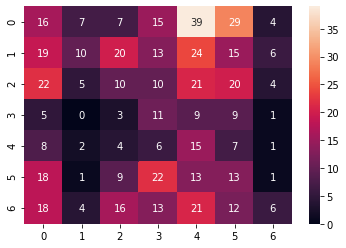

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')